# Load the dataset

In [1]:
import pandas
from scipy import stats
import numpy
import patsy
from plotly import express
from plotly import graph_objects
from plotly import subplots
from plotly import io
io.templates.default = 'plotly_white'
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from pingouin import ancova
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read data
df = pandas.read_csv("data58.csv")
df[:5]

# State levels of treatment
df.VLEs = pandas.Categorical(df.VLEs, ordered=True, categories=['VLE1', 'VLE2', 'VLE3'])

# Verify data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   VLEs      58 non-null     category
 1   pretest   58 non-null     float64 
 2   posttest  58 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 1.2 KB


# Exploratory Analysis

## Posttest per VLEs

In [2]:
# Absolute counts
df.VLEs.value_counts()

VLE1    20
VLE2    19
VLE3    19
Name: VLEs, dtype: int64

In [3]:
# Comparitive summary statistics of dependent variable (posttest) given each treatment level (VLEs)
df.groupby('VLEs').posttest.describe()

,count,mean,std,min,25%,50%,75%,max
VLEs,,,,,,,,
VLE1,20.0,57.612000,13.309711,40.00,47.6375,55.28,65.4175,90.56
VLE2,19.0,56.490526,20.769682,23.33,48.8900,54.44,58.8900,98.33
VLE3,19.0,77.456842,13.539188,57.22,65.5600,77.78,90.0000,98.33


In [4]:
express.box(df, x = 'VLEs', y = 'posttest', color = 'VLEs', title = 'Posttest per VLEs', labels = {'posttest':'posttest'})
#fig = express.box(df, x = 'VLEs', y = 'posttest', color = 'VLEs', title = 'Posttest per VLEs', labels = {'posttest':'posttest'})
#fig.write_html('boxplotPRE60.html', auto_open=True)
#fig.write_image("boxplotPOST60.png")

## Pretest per VLEs

In [5]:
# Comparitive summary statistics of covariate (pretest) per treatment level (VLEs)
df.groupby('VLEs').pretest.describe()

,count,mean,std,min,25%,50%,75%,max
VLEs,,,,,,,,
VLE1,20.0,44.472000,9.815169,27.78,37.780,42.22,52.085,63.89
VLE2,19.0,54.210000,22.366567,27.78,37.780,48.33,61.670,95.00
VLE3,19.0,70.467368,17.751129,36.11,58.335,80.00,86.110,91.67


In [6]:
express.box(df, x = 'VLEs', y = 'pretest', color = 'VLEs', title = 'Pretest per VLEs', labels = {'pretest':'pretest'})

#fig = express.box(df, x = 'VLEs', y = 'pretest', color = 'VLEs', title = 'Pretest per VLEs', labels = {'pretest':'pretest'})
#fig.write_html('boxplotPRE60.html', auto_open=True)
#fig.write_image("boxplotPRE60.png")

## Estimated Posttest given Pretest per VLEs

In [7]:
express.scatter(df, x = 'pretest', y = 'posttest', color = 'VLEs', trendline = 'ols',
    title = 'Posttest given Pretest per VLEs', labels = {
        'pretest':'pretest','posttest':'posttest'})

# fig = express.scatter(df, x = 'pretest', y = 'posttest', color = 'VLEs', trendline = 'ols',
#                  title = 'Posttest given Pretest per VLEs', labels = {
#                      'pretest':'pretest','posttest':'posttest'})
#fig.write_html('scatterPOSTPRE60.html', auto_open=True)
#fig.write_image("scatterPOSTPRE60.png")

# Assumption for the use of ANCOVA

## Linearity

In [8]:
express.scatter(df, x = 'pretest', y = 'posttest', trendline = 'ols',
    title = 'Posttest given Pretest', labels = {
        'pretest':'pretest','posttest':'posttest'})

# fig = express.scatter(df, x = 'pretest', y = 'posttest', trendline = 'ols',
#                  title = 'Posttest given Pretest', labels = {
#                      'pretest':'pretest','posttest':'posttest'})
#fig.write_html('linearityPOSTPRE60.html', auto_open=True)
#fig.write_image("linearityPOSTPRE60.png")

In [9]:
linear_model_pre_post = ols('posttest ~ pretest', data=df).fit()
linear_model_pre_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     88.24
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           4.19e-13
Time:                        06:05:50   Log-Likelihood:                -223.95
No. Observations:                  58   AIC:                             451.9
Df Residuals:                      56   BIC:                             456.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2002      4.582      5.064      0.000      14.022      32.378
pretest        0.7217      0.077      9.394      0.000       0.568       0.876
==============================================================================
Omnibus:                        2.136   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.364
Skew:                          -0.165   Prob(JB):                        0.506
Kurtosis:                       3.675   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Homogeneity of regression slopes

In [10]:
# Note the formula syntax
interaction_model = ols('posttest ~ pretest * VLEs', data = df).fit()
anova_lm(interaction_model, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
VLEs,2.0,5324.471809,2662.235905,20.763683,2.353318e-07
pretest,1.0,7755.854318,7755.854318,60.490545,2.863964e-10
pretest:VLEs,2.0,7.141466,3.570733,0.027849,9.725494e-01
Residual,52.0,6667.230841,128.215978,NaN,NaN


## Normality of the residuals

In [11]:
# Ancova model
model = ols('posttest ~ pretest + VLEs', data = df).fit()

In [12]:
# Add residuals to dataframe object
df['Residuals'] = model.resid

In [13]:
# Histogram of residuals
express.histogram(df, x = 'Residuals', nbins = 14)

# fig = express.histogram(df, x = 'Residuals', nbins = 14)
# #fig.write_html('normality60.html', auto_open=True)
# fig.write_image("normality60.png")

In [14]:
# ﻿Null hypothesis of the Shapiro-Wilk test is that the data are from a population in which we have a normal distribution

stats.shapiro(df.Residuals)

ShapiroResult(statistic=0.9896185398101807, pvalue=0.9013279676437378)

## Homogeneity of varians

In [15]:
# Assign residuals for each treatment level
residVLE1 = df.loc[df.VLEs == 'VLE1', 'Residuals'].to_list()
residVLE2 = df.loc[df.VLEs == 'VLE2', 'Residuals'].to_list()
residVLE3 = df.loc[df.VLEs == 'VLE3', 'Residuals'].to_list()
stats.levene (residVLE1, residVLE2, residVLE3)

LeveneResult(statistic=2.8633697961669404, pvalue=0.06561829411370573)

## Outliers

In [16]:
# Sum over all studentized residuals with absolute value more than 3
numpy.sum(numpy.abs(model.get_influence().resid_studentized_internal) > 3)

0

Outliers from Z-scores method:  []


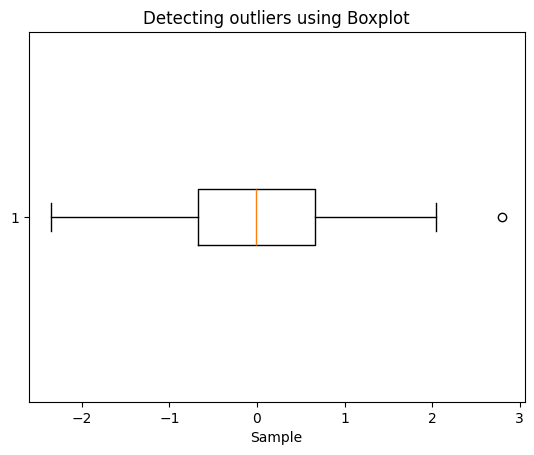

In [17]:
sample = model.get_influence().resid_studentized_internal
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = numpy.mean(df)
    std = numpy.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [18]:
express.box(df, y = sample, title = 'Outlier')

# ANCOVA model

## ANOVA and ANCOVA

In [19]:
# Model and anova table
anova = ols('posttest ~ VLEs', data = df).fit()
anova_lm(anova)

,df,sum_sq,mean_sq,F,PR(>F)
VLEs,2.0,5324.471809,2662.235905,10.146963,0.000177
Residual,55.0,14430.226625,262.367757,NaN,NaN


In [20]:
# Sum of squares due to the regression
ssrANOVA = anova.ess
ssrANOVA

5324.4718092196

In [21]:
# Sum of squares due to the error
sseANOVA = anova.ssr
sseANOVA

14430.226625263158

In [22]:
# Total sum of squares
sstANOVA = ssrANOVA + sseANOVA
sstANOVA

19754.698434482758

In [23]:
# Calculate the value for the coefficient of determination
ssrANOVA/sstANOVA


0.2695293895211016

In [24]:
# Use the rsquared attribute of the model
anova.rsquared

0.2695293895211016

In [25]:
# Ancova table of Anova model
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
VLEs,2.0,5324.471809,2662.235905,21.539215,1.325310e-07
pretest,1.0,7755.854318,7755.854318,62.749891,1.320739e-10
Residual,54.0,6674.372307,123.599487,NaN,NaN


In [26]:
sseANCOVA = model.ssr
sseANCOVA

6674.372306963574

In [27]:
# Difference between sum of squares due to the error between ANOVA and ANCOVA
print('Sum of squares due to the error of ANOVA model: ', '\t', sseANOVA)
print('Sum of squares due to the error of ANCOVA model: ', '\t', sseANCOVA)
print('Selisihnya = ', sseANOVA-sseANCOVA)
print('Persentase = ',sseANCOVA/sseANOVA*100,'%')

Sum of squares due to the error of ANOVA model:  	 14430.226625263158
Sum of squares due to the error of ANCOVA model:  	 6674.372306963574
Selisihnya =  7755.854318299584
Persentase =  46.25271993496399 %


In [28]:
# Total sum of squares of ANCOVA model
sstANCOVA = model.ess + model.ssr
sstANCOVA

19754.698434482758

In [29]:
# Print SST for both models
print('Total sum of squares of ANOVA model:','\t', sstANOVA)
print('Total sum of squares of ANCOVA model: ', '\t', sstANCOVA)

Total sum of squares of ANOVA model: 	 19754.698434482758
Total sum of squares of ANCOVA model:  	 19754.698434482758


In [30]:
anova.rsquared

0.2695293895211016

In [31]:
model.rsquared

0.6621374743279734

In [32]:
# Coeficient
model.params

Intercept       27.128318
VLEs[T.VLE2]    -7.796462
VLEs[T.VLE3]     2.026113
pretest          0.685458
dtype: float64

In [33]:
# Standard errors
model.bse

Intercept       4.581358
VLEs[T.VLE2]    3.659953
VLEs[T.VLE3]    4.212493
pretest         0.086532
dtype: float64

In [34]:
# t statistics
model.tvalues

Intercept       5.921458
VLEs[T.VLE2]   -2.130208
VLEs[T.VLE3]    0.480977
pretest         7.921483
dtype: float64

In [35]:
# p values for each coefficieent
model.pvalues

Intercept       2.278401e-07
VLEs[T.VLE2]    3.772696e-02
VLEs[T.VLE3]    6.324759e-01
pretest         1.320739e-10
dtype: float64

In [36]:
# 95% of confidence interval
model.conf_int()

,0,1
Intercept,17.943248,36.313388
VLEs[T.VLE2],-15.134227,-0.458697
VLEs[T.VLE3],-6.419426,10.471652
pretest,0.511973,0.858943


In [37]:
# Add fitted value to dataframe object
df['Estimated'] = model.fittedvalues

In [38]:
fig = subplots.make_subplots(rows = 1, cols = 2)

fig.add_trace(
    graph_objects.Box(
        y = df.posttest,
        x = df.VLEs,
        boxpoints = 'all',
        name = 'posttest'
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    graph_objects.Box(
        y = df.Estimated,
        x = df.VLEs,
        boxpoints = 'all',
        name = 'Corrected posttest'
    ),
    row = 1,
    col = 2
)

## Linear algebra

In [39]:
y, X = patsy.dmatrices('posttest ~ pretest + VLEs', data = df)

In [40]:
X[:5]

array([[ 1.  ,  0.  ,  0.  , 43.33],
       [ 1.  ,  0.  ,  0.  , 48.33],
       [ 1.  ,  0.  ,  0.  , 51.67],
       [ 1.  ,  0.  ,  0.  , 50.  ],
       [ 1.  ,  0.  ,  0.  , 38.33]])

In [41]:
y = numpy.array(y)
X = numpy.array(X)

In [42]:
XT = X.transpose()
XTX = numpy.matmul(XT, X)
XTXI= numpy.linalg.inv(XTX)
XTXIXT = numpy.matmul(XTXI, XT)
beta = numpy.matmul (XTXIXT, y)

In [43]:
beta

array([[27.12831844],
       [-7.79646224],
       [ 2.02611273],
       [ 0.68545785]])

In [44]:
model.params

Intercept       27.128318
VLEs[T.VLE2]    -7.796462
VLEs[T.VLE3]     2.026113
pretest          0.685458
dtype: float64

## ANCOVA

In [45]:
ancova(data = df, dv = 'posttest', covar = 'pretest', between = 'VLEs')

,Source,SS,DF,F,p-unc,np2
0,VLEs,995.136789,2,4.025651,2.346158e-02,0.129752
1,pretest,7755.854318,1,62.749891,1.320739e-10,0.537473
2,Residual,6674.372307,54,NaN,NaN,NaN


In [46]:
# Hasil ANCOVA menunjukkan bahwa terdapat perbedaan yang signifikan dalam hasil posttest prestasi belajar [F(2, 54) = 4.02; p < .05] antar VLEs sambil menyesuaikan pengaruh pretest.
# ANCOVA results indicate that there are significant differences in mean posttest among VLEs (p = 0.023) whilst adjusting the effect of pretest.
# The covariate pretest is significant [F(1, 54) = 62.75; p = .00; p < .05] suggesting it is an important predictor of posttest.

# Referensi

`Klopper, J. (2022). Analysis of covariance using Python. YouTube. https://www.youtube.com/watch?v=FhZB1oGVrYc.`